In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#we will be using mnist dataset consisting of 28x28 images of handwritten digits 0-9
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test, y_test) =  mnist.load_data()

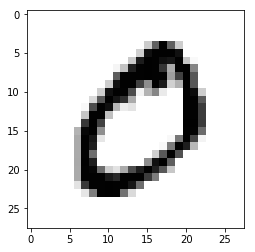

In [4]:
plt.imshow(x_train[1],cmap = plt.cm.binary)
plt.show()
#print(x_train[1])

In [5]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

we need to scale the data...

In [6]:
x_train = tf.keras.utils.normalize(x_train,axis =1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

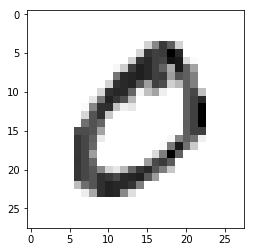

In [7]:
plt.imshow(x_train[1],cmap = plt.cm.binary)
plt.show()

In [8]:
print(x_train[1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Build the model

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Flatten()) #input layer

In [11]:
#hidden layers
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu)) 
# Activation functon - rectified linear
#add another identical layer for good measure
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

In [12]:
#output layer with 10 nodes, 1 node per possible number prediction.
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

In [13]:
#compile the model for actually optimizing/training the model we've defined.
model.compile(optimizer ='adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.fit(x_train,y_train,epochs =3)

Epoch 1/3
60000/60000 [==============================] - 19s 310us/sample - loss: 0.2665 - acc: 0.9220
Epoch 2/3
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1081 - acc: 0.9658s - loss: 0.1
Epoch 3/3
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0720 - acc: 0.9772


In [15]:
val_loss, val_acc = model.evaluate(x_test,y_test)
val_loss, val_acc

10000/10000 [==============================] - 4s 432us/sample - loss: 0.0906 - acc: 0.9708


(0.09058143515707925, 0.9708)

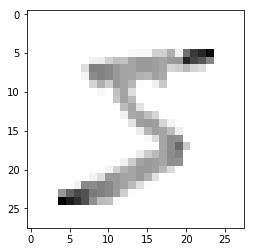

In [16]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

# Save the model

In [20]:
model.save('mnist_model.model')

In [21]:
#load the model
model1 = tf.keras.models.load_model('mnist_model.model')

In [25]:
y_pred = model1.predict(x_test)

In [26]:
y_pred

array([[2.6594622e-09, 1.4585088e-06, 1.7199667e-04, ..., 9.9979979e-01,
        4.5532889e-08, 2.6249791e-07],
       [1.1325543e-08, 4.3513738e-03, 9.9562871e-01, ..., 1.2370087e-08,
        4.1038689e-08, 1.5918018e-12],
       [8.1958547e-07, 9.9979216e-01, 5.9270160e-06, ..., 9.1819427e-05,
        6.4699954e-05, 1.0704191e-06],
       ...,
       [5.2355403e-10, 5.1741432e-07, 2.7558238e-09, ..., 6.7828573e-06,
        4.1263706e-07, 4.6118810e-05],
       [8.4492751e-07, 3.2108683e-06, 1.5424047e-07, ..., 7.8506343e-07,
        7.2638773e-05, 4.0027903e-10],
       [5.3269224e-07, 1.4222028e-08, 1.0582414e-07, ..., 2.4156482e-11,
        1.3713611e-07, 1.0813184e-10]], dtype=float32)

In [27]:
y_pred[0]

array([2.6594622e-09, 1.4585088e-06, 1.7199667e-04, 2.6530028e-05,
       3.0572803e-10, 2.7655467e-08, 2.0276817e-13, 9.9979979e-01,
       4.5532889e-08, 2.6249791e-07], dtype=float32)

In [28]:
np.argmax(y_pred[0])

7

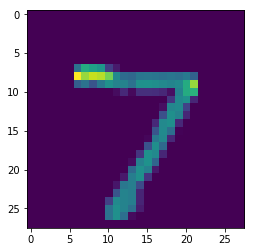

In [29]:
#Lets check if we are wrong
plt.imshow(x_test[0])
plt.show()